<a href="https://colab.research.google.com/github/sahupra1357/tensorflow/blob/main/Tensorflow_NLP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 39 (delta 8), reused 5 (delta 5), pack-reused 25
Receiving objects: 100% (39/39), 177.08 MiB | 14.35 MiB/s, done.
Resolving deltas: 100% (15/15), done.
Updating files: 100% (13/13), done.


In [2]:
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign

dev.txt  test.txt  train.txt


In [3]:
data_dir ='pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign'

In [4]:
import os
filenames = [data_dir + "/"+filename for filename in os.listdir(data_dir)]
filenames

['pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt']

In [5]:
def get_lines(filename):
  with open(filename, 'r') as f:
    return f.readlines()

In [6]:
train_lines = get_lines(filenames[2])
train_lines[11:20]

['RESULTS\tThe Outcome Measures in Rheumatology Clinical Trials-Osteoarthritis Research Society International responder rate was @ % in the intervention group and @ % in the placebo group ( p < @ ) .\n',
 'CONCLUSIONS\tLow-dose oral prednisolone had both a short-term and a longer sustained effect resulting in less knee pain , better physical function , and attenuation of systemic inflammation in older patients with knee OA ( ClinicalTrials.gov identifier NCT@ ) .\n',
 '\n',
 '###24854809\n',
 'BACKGROUND\tEmotional eating is associated with overeating and the development of obesity .\n',
 'BACKGROUND\tYet , empirical evidence for individual ( trait ) differences in emotional eating and cognitive mechanisms that contribute to eating during sad mood remain equivocal .\n',
 'OBJECTIVE\tThe aim of this study was to test if attention bias for food moderates the effect of self-reported emotional eating during sad mood ( vs neutral mood ) on actual food intake .\n',
 'OBJECTIVE\tIt was expect

In [7]:
train_lines[:12]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [8]:
len(train_lines)

210040

In [9]:
'''line_detail ={}
for i in train_lines[:12]:
  print(i)
  if '###' in i:
    counter = 0
  line_detail['line_number'] = counter
  line_detail['target'] = i.split('\t')[0]
  line_detail['text'] = i.split('\t')[1]
  line_detail['total_lines'] = counter'''


"line_detail ={}\nfor i in train_lines[:12]:\n  print(i)\n  if '###' in i:\n    counter = 0\n  line_detail['line_number'] = counter\n  line_detail['target'] = i.split('\t')[0]\n  line_detail['text'] = i.split('\t')[1]\n  line_detail['total_lines'] = counter"

In [10]:
abstract_start = [i for i, elem in enumerate(train_lines[:44]) if elem.startswith('###')]
abstract_start

[0, 14, 27]

In [11]:
abstract_end = [i for i, elem in enumerate(train_lines[:44]) if elem.startswith('\n')]
abstract_end

[13, 26, 43]

In [12]:
line_detail_list = []
ac = 0

for i, elem in enumerate(train_lines[:14]):
  line_detail ={}
  if '###' in elem:
    total_line = abstract_end[ac] - abstract_start[ac]-2
    lc = 0
    continue
  if elem.startswith('\n'):
    ac += 1
    continue
  line_detail['line_number'] = lc
  line_obj_text = elem.split('\t',1)
  line_detail['target'] = line_obj_text[0]
  line_detail['text'] = line_obj_text[1]
  line_detail['total_lines'] = total_line
  lc += 1
  line_detail_list.append(line_detail)


In [13]:
def createDictList(linelist,listl = len(train_lines) ):
  #print(listl)
  line_detail_list = []
  ac = 0
  abstract_start = [i for i, elem in enumerate(linelist[:listl]) if elem.startswith('###')]
  abstract_end = [i for i, elem in enumerate(linelist[:listl]) if elem.startswith('\n')]
  for i, elem in enumerate(linelist[:listl]):
    line_detail ={}
    if '###' in elem:
      #print(i,ac)
      total_line = abstract_end[ac] - abstract_start[ac]-2
      lc = 0
      continue
    if elem.startswith('\n'):
      ac += 1
      continue
    line_detail['line_number'] = lc
    line_obj_text = elem.split('\t',1)
    line_detail['target'] = line_obj_text[0]
    line_detail['text'] = line_obj_text[1].lower()
    line_detail['total_lines'] = total_line
    lc += 1
    line_detail_list.append(line_detail)
  return line_detail_list

In [14]:
line_dict_list = createDictList(train_lines)
line_dict_list[:14]

[{'line_number': 0,
  'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .\n',
  'total_lines': 11},
 {'line_number': 1,
  'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
  'total_lines': 11},
 {'line_number': 2,
  'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
  'total_lines': 11},
 {'line_number': 3,
  'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
  'total_lines': 11},
 {'line_number': 4,
  'target': 'METHODS',
  'text': 'secondary outcome measures

In [15]:
import pandas as pd
train_data_frame = pd.DataFrame.from_dict(line_dict_list)

In [16]:
train_data_frame.head(52)

,line_number,target,text,total_lines
0,0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,11
1,1,METHODS,a total of @ patients with primary knee oa wer...,11
2,2,METHODS,outcome measures included pain reduction and i...,11
3,3,METHODS,pain was assessed using the visual analog pain...,11
4,4,METHODS,secondary outcome measures included the wester...,11
5,5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",11
6,6,RESULTS,there was a clinically relevant reduction in t...,11
7,7,RESULTS,the mean difference between treatment arms ( @...,11
8,8,RESULTS,"further , there was a clinically relevant redu...",11
9,9,RESULTS,these differences remained significant at @ we...,11


In [17]:
filenames[2]

'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt'

In [18]:
filenames[1]

'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt'

In [19]:
filenames[0]

'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt'

In [20]:
%%time
train_lines = get_lines(filenames[2])
val_lines = get_lines(filenames[0])
test_lines = get_lines(filenames[1])

CPU times: user 46.6 ms, sys: 59.7 ms, total: 106 ms
Wall time: 110 ms


In [21]:
%%time
train_line_dict_list = createDictList(train_lines,len(train_lines))
val_line_dict_list = createDictList(val_lines,len(val_lines))
test_line_dict_list = createDictList(test_lines,len(test_lines))

CPU times: user 483 ms, sys: 117 ms, total: 600 ms
Wall time: 612 ms


In [22]:
len(train_line_dict_list),len(val_line_dict_list),len(test_line_dict_list)

(180040, 30212, 30135)

In [23]:
%%time
train_df = pd.DataFrame(train_line_dict_list)
val_df = pd.DataFrame(val_line_dict_list)
test_df = pd.DataFrame(test_line_dict_list)

CPU times: user 277 ms, sys: 12.7 ms, total: 290 ms
Wall time: 293 ms


In [24]:
train_df.head(4)

,line_number,target,text,total_lines
0,0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,11
1,1,METHODS,a total of @ patients with primary knee oa wer...,11
2,2,METHODS,outcome measures included pain reduction and i...,11
3,3,METHODS,pain was assessed using the visual analog pain...,11


In [25]:
train_df.target.value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

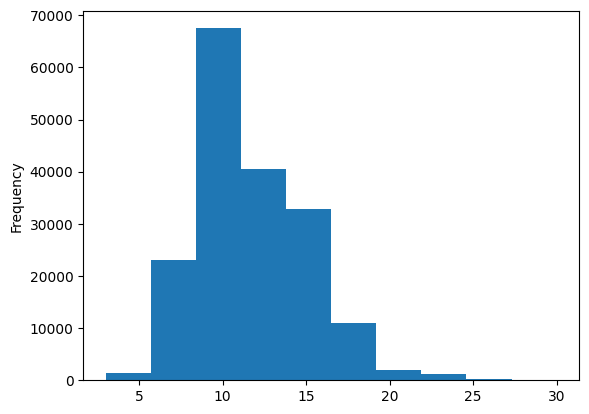

In [26]:
train_df.total_lines.plot.hist();

In [27]:
train_sentences = train_df["text"].tolist()
val_sentences = val_df["text"].tolist()
test_sentences = test_df["text"].tolist()
len(train_sentences), len(val_sentences), len(test_sentences)

(180040, 30212, 30135)

In [28]:
train_df["target"].to_numpy().reshape(-1, 1)

array([['OBJECTIVE'],
       ['METHODS'],
       ['METHODS'],
       ...,
       ['RESULTS'],
       ['CONCLUSIONS'],
       ['CONCLUSIONS']], dtype=object)

In [29]:
train_df["target"].value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

In [30]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1, 1))
val_labels_one_hot = one_hot_encoder.transform(val_df["target"].to_numpy().reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.transform(test_df["target"].to_numpy().reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [31]:
train_labels_one_hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [32]:
train_labels_one_hot.shape

(180040, 5)

In [33]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df["target"].to_numpy())
val_labels_encoded = label_encoder.transform(val_df["target"].to_numpy())
test_labels_encoded = label_encoder.transform(test_df["target"].to_numpy())

# Check what training labels look like
train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

In [34]:
train_labels_encoded.shape

(180040,)

In [35]:
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_
num_classes, class_names

(5,
 array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

##1 - Naive Bayes

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [37]:
model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", MultinomialNB()),
])

model_0.fit(train_sentences,train_labels_encoded)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [38]:
model_0.score(X=val_sentences,
              y=val_labels_encoded)

0.7218323844829869

In [39]:
baseline_preds = model_0.predict(val_sentences)
baseline_preds

array([4, 1, 3, ..., 4, 4, 1])

In [40]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  model_accuracy =accuracy_score(y_true, y_pred)*100
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [41]:
baseline_results = calculate_results(y_true=val_labels_encoded,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

## Deep Seq model

In [42]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [43]:
sent_lens = [len(sentence.split()) for sentence in train_sentences]
avg_sent_len = np.mean(sent_lens)
avg_sent_len

26.338269273494777

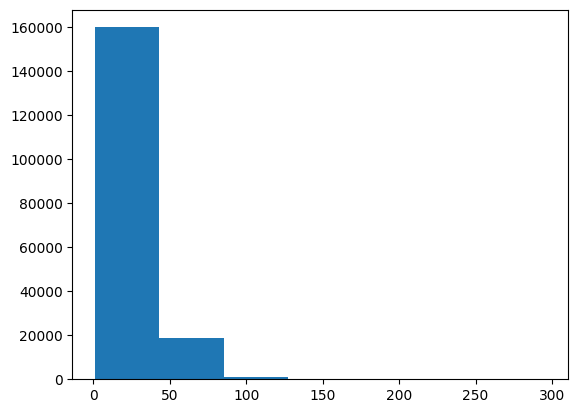

In [44]:
import matplotlib.pyplot as plt
plt.hist(sent_lens, bins=7);

In [45]:
output_seq_len = int(np.percentile(sent_lens, 95))
output_seq_len

55

In [46]:
max(sent_lens)

296

In [47]:
max_tokens = 68000

In [48]:
from tensorflow.keras.layers import TextVectorization
text_vectorizer = TextVectorization(max_tokens=max_tokens,
                                    output_sequence_length=55)

In [49]:
text_vectorizer.adapt(train_sentences)

In [50]:
import random
target_sentence = random.choice(train_sentences)
print(f"Text:\n{target_sentence}")
print(f"\nLength of text: {len(target_sentence.split())}")
print(f"\nVectorized text:\n{text_vectorizer([target_sentence])}")

Text:
( funded by the canadian institutes of health research ; quarisma current controlled trials number , isrctn@ . )


Length of text: 19

Vectorized text:
[[ 1644    22     2  3323  2925     4    97   285 47476   359   106   233
    154   811     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]]


In [51]:
rct_20k_text_vocab = text_vectorizer.get_vocabulary()
print(f"Number of words in vocabulary: {len(rct_20k_text_vocab)}"),
print(f"Most common words in the vocabulary: {rct_20k_text_vocab[:5]}")
print(f"Least common words in the vocabulary: {rct_20k_text_vocab[-5:]}")

Number of words in vocabulary: 64841
Most common words in the vocabulary: ['', '[UNK]', 'the', 'and', 'of']
Least common words in the vocabulary: ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


In [52]:
text_vectorizer.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'dtype': 'string',
 'batch_input_shape': (None,),
 'max_tokens': 68000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None,
 'encoding': 'utf-8',
 'vocabulary_size': 64841}

In [53]:
token_embed = layers.Embedding(input_dim=len(rct_20k_text_vocab), # length of vocabulary
                               output_dim=128, # Note: different embedding sizes result in drastically different numbers of parameters to train
                               # Use masking to handle variable sequence lengths (save space)
                               mask_zero=True,
                               name="token_embedding")

# Show example embedding
print(f"Sentence before vectorization:\n{target_sentence}\n")
vectorized_sentence = text_vectorizer([target_sentence])
print(f"Sentence after vectorization (before embedding):\n{vectorized_sentence}\n")
embedded_sentence = token_embed(vectorized_sentence)
print(f"Sentence after embedding:\n{embedded_sentence}\n")
print(f"Embedded sentence shape: {embedded_sentence.shape}")

Sentence before vectorization:
( funded by the canadian institutes of health research ; quarisma current controlled trials number , isrctn@ . )


Sentence after vectorization (before embedding):
[[ 1644    22     2  3323  2925     4    97   285 47476   359   106   233
    154   811     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]]

Sentence after embedding:
[[[ 0.04689929 -0.02498883 -0.04870511 ...  0.01573766  0.00815288
    0.00868759]
  [-0.01394432 -0.00203589  0.0113735  ...  0.02866687 -0.00565062
    0.02101754]
  [ 0.03919065 -0.04813879 -0.01301705 ...  0.01251752  0.03773557
    0.00576327]
  ...
  [-0.02916669  0.01535601  0.02885694 ... -0.02106508  0.02463489
   -0.02780123]
  [-0.02916669  0.01535601  0.02885694 ... -0.02106508  0.02463489
   -0.02780123]
  [-0.02916669 

In [54]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
valid_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))

train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [55]:
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [56]:
inputs = layers.Input(shape=(1,), dtype=tf.string)
text_vectors = text_vectorizer(inputs)
token_embeddings = token_embed(text_vectors)
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(token_embeddings)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_1 = tf.keras.Model(inputs, outputs)

model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [57]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 55)                0         
 ctorization)                                                    
                                                                 
 token_embedding (Embedding  (None, 55, 128)           8299648   
 )                                                               
                                                                 
 conv1d (Conv1D)             (None, 55, 64)            41024     
                                                                 
 global_average_pooling1d (  (None, 64)                0         
 GlobalAveragePooling1D)                                         
                                                             

In [58]:
model_1_history = model_1.fit(train_dataset,
                              steps_per_epoch=int(0.1 * len(train_dataset)),
                              epochs=3,
                              validation_data=valid_dataset,
                              validation_steps=int(0.1 * len(valid_dataset)))

Epoch 1/3
562/562 [==============================] - 85s 149ms/step - loss: 0.9170 - accuracy: 0.6372 - val_loss: 0.6889 - val_accuracy: 0.7377
Epoch 2/3
562/562 [==============================] - 74s 132ms/step - loss: 0.6638 - accuracy: 0.7552 - val_loss: 0.6403 - val_accuracy: 0.7686
Epoch 3/3
562/562 [==============================] - 79s 141ms/step - loss: 0.6211 - accuracy: 0.7735 - val_loss: 0.5958 - val_accuracy: 0.7876


In [59]:
model_1.evaluate(valid_dataset)

945/945 [==============================] - 6s 7ms/step - loss: 0.5973 - accuracy: 0.7858


[0.5972606539726257, 0.785813570022583]

In [60]:
model_1_pred_probs = model_1.predict(valid_dataset)
model_1_pred_probs

945/945 [==============================] - 6s 6ms/step


array([[4.4438648e-01, 1.6436425e-01, 8.0122754e-02, 2.7680969e-01,
        3.4316797e-02],
       [3.8489103e-01, 3.6067191e-01, 9.6624512e-03, 2.3569912e-01,
        9.0754163e-03],
       [1.4461887e-01, 6.2826178e-03, 2.6891904e-03, 8.4637624e-01,
        3.3241497e-05],
       ...,
       [1.0924949e-05, 1.0184420e-03, 1.1901270e-03, 4.1516755e-06,
        9.9777633e-01],
       [4.8576161e-02, 4.7937292e-01, 6.7847408e-02, 5.5739295e-02,
        3.4846434e-01],
       [2.3070681e-01, 5.9141392e-01, 7.1080312e-02, 6.3302882e-02,
        4.3496106e-02]], dtype=float32)

In [61]:
model_1_preds = tf.argmax(model_1_pred_probs, axis=1)

In [62]:
model_1_results = calculate_results(y_true=val_labels_encoded,
                                     y_pred=model_1_preds)
model_1_results

{'accuracy': 78.58135840063551,
 'precision': 0.7825500942949689,
 'recall': 0.785813584006355,
 'f1': 0.7832303481933115}

## Universal Sentance Encoder

In [63]:
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://www.kaggle.com/models/google/universal-sentence-encoder/frameworks/TensorFlow2/variations/universal-sentence-encoder/versions/2")

In [64]:
tf_hub_embedding_layer.trainable

False

In [65]:
random_training_sentence = random.choice(train_sentences)
print(f"Random training sentence:\n{random_training_sentence}\n")
use_embedded_sentence = tf_hub_embedding_layer([random_training_sentence])
print(f"Sentence after embedding:\n{use_embedded_sentence[0][:30]} (truncated output)...\n")
print(f"Length of sentence embedding:\n{len(use_embedded_sentence[0])}")

Random training sentence:
administration of clopidogrel was associated with variable platelet antiaggregatory activity and attenuated some clinical signs of endotoxemia .


Sentence after embedding:
[ 0.02416441  0.06104961  0.01753273 -0.01305648 -0.02714772 -0.01963698
  0.04966726 -0.04708228  0.029688    0.03548953  0.09858954  0.03072919
 -0.01992833  0.05134355 -0.04440396 -0.07131327 -0.09711783 -0.03616985
  0.03728961  0.02871702 -0.00700774  0.06941459 -0.04400145  0.01181578
  0.06915609 -0.05602039 -0.00348741  0.00656212 -0.06363213  0.07564547] (truncated output)...

Length of sentence embedding:
512


In [66]:
inputs = layers.Input(shape=[], dtype=tf.string)
token_embeddings = tf_hub_embedding_layer(inputs)
x = layers.Dense(128, activation="relu")(token_embeddings)
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_2 = tf.keras.Model(inputs, outputs)

model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [67]:
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None,)]                 0         
                                                                 
 keras_layer (KerasLayer)    (None, 512)               256797824 
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 5)                 645       
                                                                 
Total params: 256864133 (979.86 MB)
Trainable params: 66309 (259.02 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [68]:
model_2_history = model_2.fit(train_dataset,
                              steps_per_epoch=int(0.1 * len(train_dataset)),
                              epochs=3,
                              validation_data=valid_dataset,
                              validation_steps=int(0.1 * len(valid_dataset)))

Epoch 1/3
562/562 [==============================] - 13s 18ms/step - loss: 0.9223 - accuracy: 0.6459 - val_loss: 0.8005 - val_accuracy: 0.6832
Epoch 2/3
562/562 [==============================] - 9s 16ms/step - loss: 0.7738 - accuracy: 0.7000 - val_loss: 0.7566 - val_accuracy: 0.7051
Epoch 3/3
562/562 [==============================] - 10s 18ms/step - loss: 0.7568 - accuracy: 0.7115 - val_loss: 0.7437 - val_accuracy: 0.7094


In [69]:
model_2.evaluate(valid_dataset)

945/945 [==============================] - 13s 14ms/step - loss: 0.7483 - accuracy: 0.7102


[0.7483126521110535, 0.7102475762367249]

In [70]:
model_2_prob_pred = model_2.predict(valid_dataset)
model_2_prob_pred

945/945 [==============================] - 14s 14ms/step


array([[3.63381475e-01, 4.09740061e-01, 3.94216599e-03, 2.09214553e-01,
        1.37216905e-02],
       [3.28437328e-01, 4.46993291e-01, 4.04162426e-03, 2.16498524e-01,
        4.02920181e-03],
       [2.35465750e-01, 1.30911767e-01, 1.86831374e-02, 5.86969495e-01,
        2.79700123e-02],
       ...,
       [7.87816534e-04, 4.14805021e-03, 3.67679894e-02, 5.21342270e-04,
        9.57774758e-01],
       [4.83166752e-03, 6.09282777e-02, 2.59696841e-01, 1.79852790e-03,
        6.72744751e-01],
       [1.78727329e-01, 1.94378808e-01, 5.68661928e-01, 6.58805575e-03,
        5.16438074e-02]], dtype=float32)

In [71]:
model_2_prob = tf.argmax(model_2_prob_pred,axis=1)
model_2_prob

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([1, 1, 3, ..., 4, 4, 2])>

In [72]:
model_2_results = calculate_results(val_labels_encoded,model_2_prob)

In [73]:
model_2_results

{'accuracy': 71.02475837415597,
 'precision': 0.7119348672949112,
 'recall': 0.7102475837415596,
 'f1': 0.7078219300647262}

## Char embading

In [74]:
def split_chars(text):
  return " ".join(list(text))

split_chars(random_training_sentence)

'a d m i n i s t r a t i o n   o f   c l o p i d o g r e l   w a s   a s s o c i a t e d   w i t h   v a r i a b l e   p l a t e l e t   a n t i a g g r e g a t o r y   a c t i v i t y   a n d   a t t e n u a t e d   s o m e   c l i n i c a l   s i g n s   o f   e n d o t o x e m i a   . \n'

In [75]:
train_chars = [split_chars(sentence) for sentence in train_sentences]
val_chars = [split_chars(sentence) for sentence in val_sentences]
test_chars = [split_chars(sentence) for sentence in test_sentences]
print(train_chars[0])

t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   . 



In [76]:
char_lens = [len(sentence) for sentence in train_sentences]
mean_char_len = np.mean(char_lens)
mean_char_len

150.3662574983337

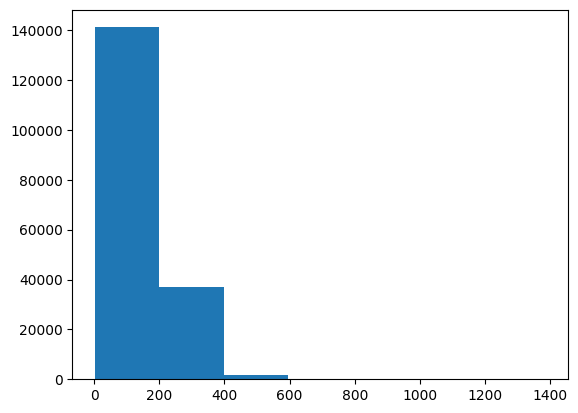

In [77]:
import matplotlib.pyplot as plt
plt.hist(char_lens, bins=7);

In [78]:
output_seq_char_len = int(np.percentile(char_lens, 95))
output_seq_char_len

291

In [79]:
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [80]:
NUM_CHAR_TOKENS = len(alphabet) + 2
char_vectorizer = TextVectorization(max_tokens=NUM_CHAR_TOKENS,
                                    output_sequence_length=output_seq_char_len,
                                    standardize="lower_and_strip_punctuation",
                                    name="char_vectorizer")

char_vectorizer.adapt(train_chars)

In [81]:
char_vocab = char_vectorizer.get_vocabulary()
print(f"Number of different characters in character vocab: {len(char_vocab)}")
print(f"5 most common characters: {char_vocab[:5]}")
print(f"5 least common characters: {char_vocab[-5:]}")

Number of different characters in character vocab: 28
5 most common characters: ['', '[UNK]', 'e', 't', 'i']
5 least common characters: ['k', 'x', 'z', 'q', 'j']


In [82]:
random_train_chars = random.choice(train_chars)
print(f"Charified text:\n{random_train_chars}")
print(f"\nLength of chars: {len(random_train_chars.split())}")
vectorized_chars = char_vectorizer([random_train_chars])
print(f"\nVectorized chars:\n{vectorized_chars}")
print(f"\nLength of vectorized chars: {len(vectorized_chars[0])}")

Charified text:
t h e   n u m b e r   o f   s u t u r e s   a n d   t e c h n i q u e   o f   c l o s u r e   d i d   n o t   i n f l u e n c e   t h e   a m o u n t   o f   a s t i g m a t i s m   a t   @   y e a r   . 


Length of chars: 84

Vectorized chars:
[[ 3 13  2  6 16 15 22  2  8  7 17  9 16  3 16  8  2  9  5  6 10  3  2 11
  13  6  4 26 16  2  7 17 11 12  7  9 16  8  2 10  4 10  6  7  3  4  6 17
  12 16  2  6 11  2  3 13  2  5 15  7 16  6  3  7 17  5  9  3  4 18 15  5
   3  4  9 15  5  3 19  2  5  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

In [83]:
char_embed = layers.Embedding(input_dim=NUM_CHAR_TOKENS,
                              output_dim=25,
                              mask_zero=False,
                              name="char_embed")

# Test out character embedding layer
print(f"Charified text (before vectorization and embedding):\n{random_train_chars}\n")
char_embed_example = char_embed(char_vectorizer([random_train_chars]))
print(f"Embedded chars (after vectorization and embedding):\n{char_embed_example}\n")
print(f"Character embedding shape: {char_embed_example.shape}")

Charified text (before vectorization and embedding):
t h e   n u m b e r   o f   s u t u r e s   a n d   t e c h n i q u e   o f   c l o s u r e   d i d   n o t   i n f l u e n c e   t h e   a m o u n t   o f   a s t i g m a t i s m   a t   @   y e a r   . 


Embedded chars (after vectorization and embedding):
[[[ 0.04073998 -0.02590871  0.02489119 ...  0.01683576 -0.00559485
    0.00118747]
  [-0.01992627  0.0206982  -0.01611673 ...  0.0069412  -0.04621564
    0.01945093]
  [-0.03681951  0.03727995 -0.03260388 ... -0.04263916  0.0423869
   -0.01009315]
  ...
  [-0.0078155  -0.01637544 -0.00975739 ... -0.0367951   0.04180039
    0.01661322]
  [-0.0078155  -0.01637544 -0.00975739 ... -0.0367951   0.04180039
    0.01661322]
  [-0.0078155  -0.01637544 -0.00975739 ... -0.0367951   0.04180039
    0.01661322]]]

Character embedding shape: (1, 291, 25)


In [84]:
inputs = layers.Input(shape=(1,), dtype="string")
char_vectors = char_vectorizer(inputs)
char_embeddings = char_embed(char_vectors)
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(char_embeddings)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_3 = tf.keras.Model(inputs=inputs,
                         outputs=outputs,
                         name="model_3_conv1D_char_embedding")

# Compile model
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [85]:
model_3.summary()

Model: "model_3_conv1D_char_embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 char_vectorizer (TextVecto  (None, 291)               0         
 rization)                                                       
                                                                 
 char_embed (Embedding)      (None, 291, 25)           1750      
                                                                 
 conv1d_1 (Conv1D)           (None, 291, 64)           8064      
                                                                 
 global_max_pooling1d (Glob  (None, 64)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense_3 (Dense)             (None, 5

In [91]:
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

train_char_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [92]:
model_3_history = model_3.fit(train_char_dataset,
                              steps_per_epoch=int(0.1 * len(train_dataset)),
                              epochs=3,
                              validation_data=val_char_dataset,
                              validation_steps=int(0.1 * len(val_char_dataset)))

Epoch 1/3
562/562 [==============================] - 17s 31ms/step - loss: 1.2497 - accuracy: 0.4781 - val_loss: 1.0741 - val_accuracy: 0.5565
Epoch 2/3
562/562 [==============================] - 14s 24ms/step - loss: 1.0292 - accuracy: 0.5801 - val_loss: 0.9724 - val_accuracy: 0.6051
Epoch 3/3
562/562 [==============================] - 15s 26ms/step - loss: 0.9504 - accuracy: 0.6236 - val_loss: 0.8991 - val_accuracy: 0.6506


In [94]:
model_3.evaluate(val_char_dataset)

945/945 [==============================] - 10s 11ms/step - loss: 0.9079 - accuracy: 0.6434


[0.9078835248947144, 0.6433536410331726]

In [95]:
model_3_prob_pred = model_3.predict(val_char_dataset)
model_3_prob_pred

945/945 [==============================] - 9s 9ms/step


array([[0.1369187 , 0.36240906, 0.16199939, 0.2324251 , 0.10624778],
       [0.19053157, 0.41320267, 0.1010183 , 0.16478129, 0.13046615],
       [0.14837512, 0.3511    , 0.10571583, 0.11282879, 0.28198022],
       ...,
       [0.00927189, 0.01933679, 0.15343873, 0.01139194, 0.80656064],
       [0.03212189, 0.17184426, 0.380525  , 0.03301574, 0.3824932 ],
       [0.25239286, 0.433183  , 0.08305722, 0.22780026, 0.0035666 ]],
      dtype=float32)

In [96]:
model_3_prob = tf.argmax(model_3_prob_pred,axis=1)
model_3_prob

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([1, 1, 1, ..., 4, 4, 1])>

In [97]:
model_3_results = calculate_results(val_labels_encoded,model_3_prob)
model_3_results

{'accuracy': 64.33536343174897,
 'precision': 0.6390848427314819,
 'recall': 0.6433536343174897,
 'f1': 0.6338591567774033}

## Hybrid embading

In [98]:
token_inputs = layers.Input(shape=[], dtype=tf.string, name="token_input")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_output = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs=token_output)

char_inputs = layers.Input(shape=(1,), dtype=tf.string, name="char_input")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(25))(char_embeddings) # bi-LSTM shown in Figure 1 of https://arxiv.org/pdf/1612.05251.pdf
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)

token_char_concat = layers.Concatenate(name="token_char_hybrid")([token_model.output,
                                                                  char_model.output])

combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_dense = layers.Dense(200, activation="relu")(combined_dropout)
final_dropout = layers.Dropout(0.5)(combined_dense)
output_layer = layers.Dense(num_classes, activation="softmax")(final_dropout)

model_4 = tf.keras.Model(inputs=[token_model.input, char_model.input],
                         outputs=output_layer,
                         name="model_4_token_and_char_embeddings")

In [99]:
model_4.summary()

Model: "model_4_token_and_char_embeddings"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 char_input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 token_input (InputLayer)    [(None,)]                    0         []                            
                                                                                                  
 char_vectorizer (TextVecto  (None, 291)                  0         ['char_input[0][0]']          
 rization)                                                                                        
                                                                                                  
 keras_layer (KerasLayer)    (None, 512)                  2567978 

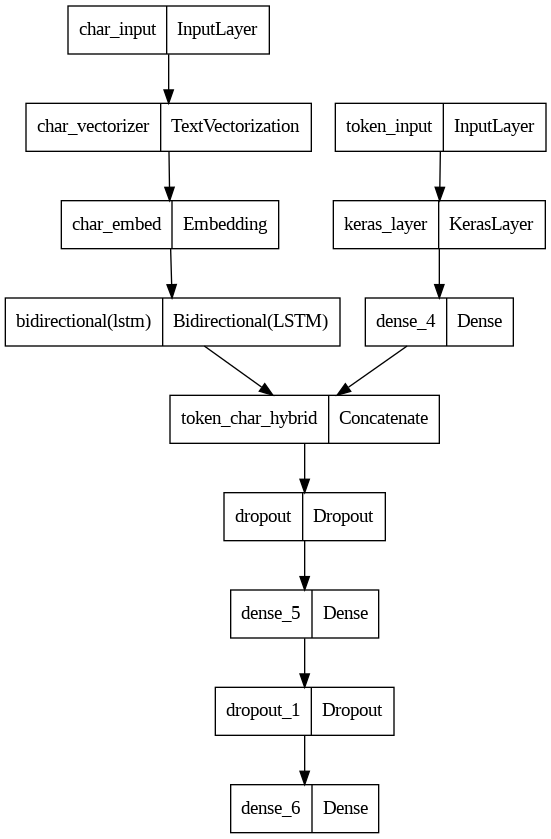

In [100]:
from tensorflow.keras.utils import plot_model
plot_model(model_4)

In [102]:
model_4.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [103]:
train_char_token_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars))
train_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_char_token_dataset = tf.data.Dataset.zip((train_char_token_data, train_char_token_labels))

train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

val_char_token_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars))
val_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_dataset = tf.data.Dataset.zip((val_char_token_data, val_char_token_labels))
val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [104]:
train_char_token_dataset, val_char_token_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [105]:
model_4_history = model_4.fit(train_char_token_dataset, # train on dataset of token and characters
                              steps_per_epoch=int(0.1 * len(train_char_token_dataset)),
                              epochs=3,
                              validation_data=val_char_token_dataset,
                              validation_steps=int(0.1 * len(val_char_token_dataset)))

Epoch 1/3
562/562 [==============================] - 136s 229ms/step - loss: 0.9751 - accuracy: 0.6098 - val_loss: 0.7880 - val_accuracy: 0.6935
Epoch 2/3
562/562 [==============================] - 123s 219ms/step - loss: 0.7984 - accuracy: 0.6963 - val_loss: 0.7241 - val_accuracy: 0.7257
Epoch 3/3
562/562 [==============================] - 124s 221ms/step - loss: 0.7739 - accuracy: 0.7045 - val_loss: 0.6886 - val_accuracy: 0.7417


In [106]:
model_4.evaluate(val_char_token_dataset)

945/945 [==============================] - 55s 58ms/step - loss: 0.6960 - accuracy: 0.7348


[0.6960312128067017, 0.734840452671051]

In [107]:
model_4_pred_probs = model_4.predict(val_char_token_dataset)
model_4_pred_probs

945/945 [==============================] - 57s 59ms/step


array([[5.1313376e-01, 2.5555319e-01, 4.5757033e-03, 2.1504226e-01,
        1.1695097e-02],
       [3.3324221e-01, 4.8901156e-01, 2.3012350e-03, 1.7367817e-01,
        1.7668464e-03],
       [2.8554061e-01, 9.6227735e-02, 7.6417647e-02, 5.0138330e-01,
        4.0430631e-02],
       ...,
       [2.5127278e-04, 5.7534659e-03, 4.1007597e-02, 6.7299217e-05,
        9.5292032e-01],
       [1.0089331e-02, 7.3464602e-02, 2.9373407e-01, 5.3532599e-03,
        6.1735874e-01],
       [3.3539963e-01, 2.4233186e-01, 2.8991550e-01, 5.3172335e-02,
        7.9180703e-02]], dtype=float32)

In [108]:
model_4_preds = tf.argmax(model_4_pred_probs, axis=1)
model_4_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 0])>

In [109]:
model_4_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_4_preds)
model_4_results

{'accuracy': 73.48404607440752,
 'precision': 0.7346926167562112,
 'recall': 0.7348404607440752,
 'f1': 0.7329348288013359}

##Positional encoding

In [110]:
train_df.head()

,line_number,target,text,total_lines
0,0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,11
1,1,METHODS,a total of @ patients with primary knee oa wer...,11
2,2,METHODS,outcome measures included pain reduction and i...,11
3,3,METHODS,pain was assessed using the visual analog pain...,11
4,4,METHODS,secondary outcome measures included the wester...,11


In [111]:
train_df["line_number"].value_counts()

0     15000
1     15000
2     15000
3     15000
4     14992
5     14949
6     14758
7     14279
8     13346
9     11981
10    10041
11     7892
12     5853
13     4152
14     2835
15     1861
16     1188
17      751
18      462
19      286
20      162
21      101
22       66
23       33
24       22
25       14
26        7
27        4
28        3
29        1
30        1
Name: line_number, dtype: int64

<Axes: ylabel='Frequency'>

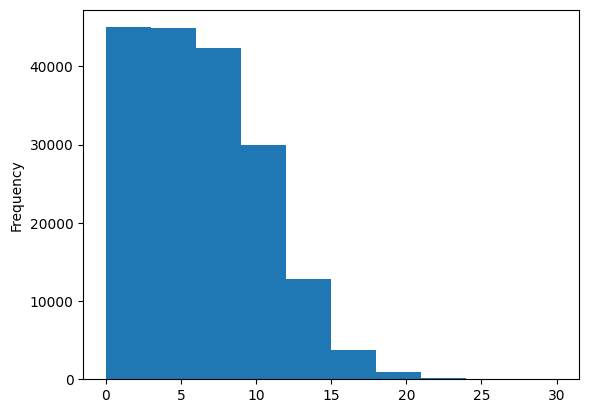

In [112]:
train_df.line_number.plot.hist()

In [113]:
train_line_numbers_one_hot = tf.one_hot(train_df["line_number"].to_numpy(), depth=15)
val_line_numbers_one_hot = tf.one_hot(val_df["line_number"].to_numpy(), depth=15)
test_line_numbers_one_hot = tf.one_hot(test_df["line_number"].to_numpy(), depth=15)

In [114]:
train_line_numbers_one_hot.shape, train_line_numbers_one_hot[:20]

(TensorShape([180040, 15]),
 <tf.Tensor: shape=(20, 15), dtype=float32, numpy=
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0.

In [115]:
train_df["total_lines"].value_counts()

11    24468
10    23639
12    22113
9     19400
13    18438
14    14610
8     12285
15    10768
7      7464
16     7429
17     5202
6      3353
18     3344
19     2480
20     1281
5      1146
21      770
22      759
23      264
4       215
24      200
25      182
26       81
28       58
3        32
30       31
27       28
Name: total_lines, dtype: int64

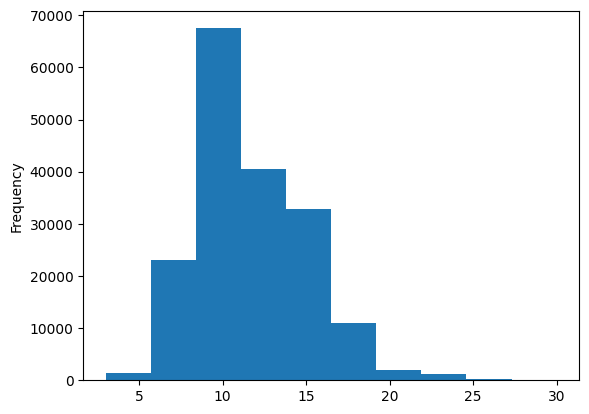

In [116]:
train_df.total_lines.plot.hist();

In [117]:
np.percentile(train_df.total_lines, 98)

20.0

In [118]:
train_total_lines_one_hot = tf.one_hot(train_df["total_lines"].to_numpy(), depth=20)
val_total_lines_one_hot = tf.one_hot(val_df["total_lines"].to_numpy(), depth=20)
test_total_lines_one_hot = tf.one_hot(test_df["total_lines"].to_numpy(), depth=20)
train_total_lines_one_hot.shape, train_total_lines_one_hot[:10]

(TensorShape([180040, 20]),
 <tf.Tensor: shape=(10, 20), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0

In [119]:
token_inputs = layers.Input(shape=[], dtype="string", name="token_inputs")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_outputs = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs=token_outputs)

char_inputs = layers.Input(shape=(1,), dtype="string", name="char_inputs")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(32))(char_embeddings)
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)

line_number_inputs = layers.Input(shape=(15,), dtype=tf.int32, name="line_number_input")
x = layers.Dense(32, activation="relu")(line_number_inputs)
line_number_model = tf.keras.Model(inputs=line_number_inputs,
                                   outputs=x)

total_lines_inputs = layers.Input(shape=(20,), dtype=tf.int32, name="total_lines_input")
y = layers.Dense(32, activation="relu")(total_lines_inputs)
total_line_model = tf.keras.Model(inputs=total_lines_inputs,
                                  outputs=y)

combined_embeddings = layers.Concatenate(name="token_char_hybrid_embedding")([token_model.output,
                                                                              char_model.output])


z = layers.Dense(256, activation="relu")(combined_embeddings)
z = layers.Dropout(0.5)(z)


z = layers.Concatenate(name="token_char_positional_embedding")([line_number_model.output,
                                                                total_line_model.output,
                                                                z])

output_layer = layers.Dense(5, activation="softmax", name="output_layer")(z)

model_5 = tf.keras.Model(inputs=[line_number_model.input,
                                 total_line_model.input,
                                 token_model.input,
                                 char_model.input],
                         outputs=output_layer)

In [120]:
model_5.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 char_inputs (InputLayer)    [(None, 1)]                  0         []                            
                                                                                                  
 token_inputs (InputLayer)   [(None,)]                    0         []                            
                                                                                                  
 char_vectorizer (TextVecto  (None, 291)                  0         ['char_inputs[0][0]']         
 rization)                                                                                        
                                                                                                  
 keras_layer (KerasLayer)    (None, 512)                  2567978   ['token_inputs[0][0]']  

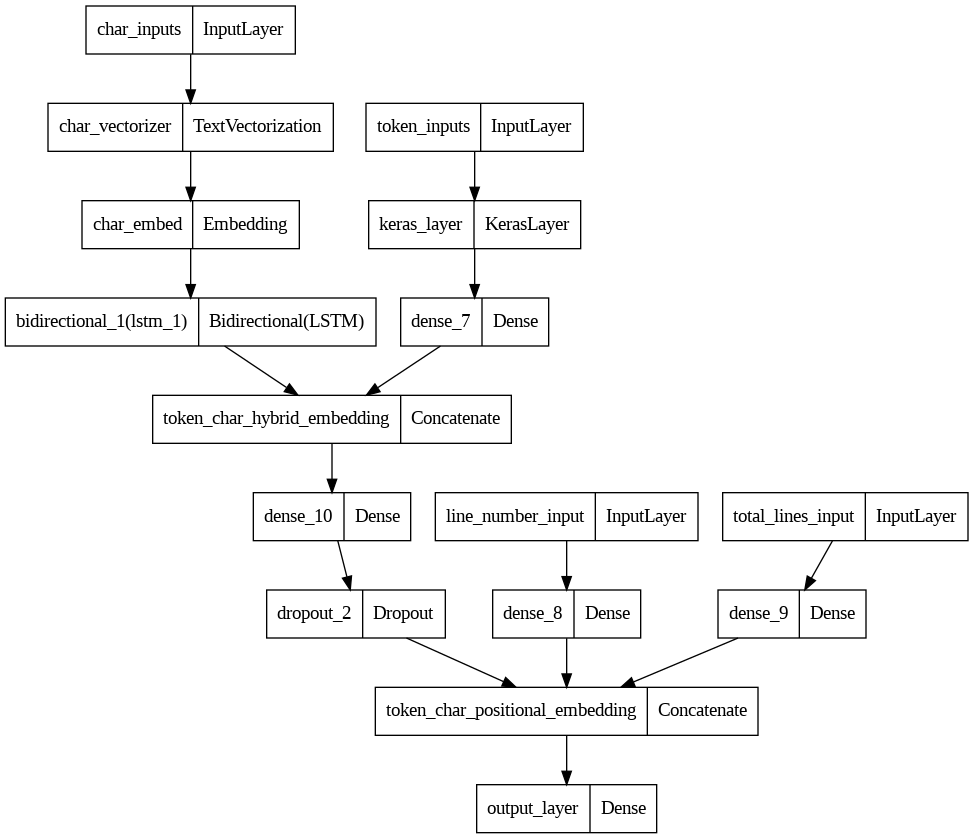

In [121]:
from tensorflow.keras.utils import plot_model
plot_model(model_5)

In [122]:
for layer in model_5.layers:
  print(layer, layer.trainable)

<keras.src.engine.input_layer.InputLayer object at 0x7e734509d060> True
<keras.src.engine.input_layer.InputLayer object at 0x7e7343d0feb0> True
<keras.src.layers.preprocessing.text_vectorization.TextVectorization object at 0x7e73efb14fa0> True
<tensorflow_hub.keras_layer.KerasLayer object at 0x7e7399cb8970> False
<keras.src.layers.core.embedding.Embedding object at 0x7e7346fbb880> True
<keras.src.layers.core.dense.Dense object at 0x7e7343d0cdf0> True
<keras.src.layers.rnn.bidirectional.Bidirectional object at 0x7e7345106740> True
<keras.src.layers.merging.concatenate.Concatenate object at 0x7e73451052a0> True
<keras.src.engine.input_layer.InputLayer object at 0x7e7346fb9630> True
<keras.src.engine.input_layer.InputLayer object at 0x7e7343c86e00> True
<keras.src.layers.core.dense.Dense object at 0x7e7343c2ac80> True
<keras.src.layers.core.dense.Dense object at 0x7e738ad16aa0> True
<keras.src.layers.core.dense.Dense object at 0x7e73451070a0> True
<keras.src.layers.regularization.dropout.

In [123]:
model_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [124]:
train_pos_char_token_data = tf.data.Dataset.from_tensor_slices((train_line_numbers_one_hot,
                                                                train_total_lines_one_hot,
                                                                train_sentences,
                                                                train_chars))
train_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_pos_char_token_dataset = tf.data.Dataset.zip((train_pos_char_token_data, train_pos_char_token_labels))
train_pos_char_token_dataset = train_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


val_pos_char_token_data = tf.data.Dataset.from_tensor_slices((val_line_numbers_one_hot,
                                                              val_total_lines_one_hot,
                                                              val_sentences,
                                                              val_chars))
val_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_pos_char_token_dataset = tf.data.Dataset.zip((val_pos_char_token_data, val_pos_char_token_labels))
val_pos_char_token_dataset = val_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


train_pos_char_token_dataset, val_pos_char_token_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [125]:
history_model_5 = model_5.fit(train_pos_char_token_dataset,
                              steps_per_epoch=int(0.1 * len(train_pos_char_token_dataset)),
                              epochs=3,
                              validation_data=val_pos_char_token_dataset,
                              validation_steps=int(0.1 * len(val_pos_char_token_dataset)))

Epoch 1/3
562/562 [==============================] - 156s 265ms/step - loss: 1.0961 - accuracy: 0.7237 - val_loss: 0.9840 - val_accuracy: 0.8019
Epoch 2/3
562/562 [==============================] - 153s 273ms/step - loss: 0.9715 - accuracy: 0.8120 - val_loss: 0.9514 - val_accuracy: 0.8311
Epoch 3/3
562/562 [==============================] - 171s 305ms/step - loss: 0.9545 - accuracy: 0.8207 - val_loss: 0.9401 - val_accuracy: 0.8324


In [126]:
model_5_pred_probs = model_5.predict(val_pos_char_token_dataset, verbose=1)
model_5_pred_probs

945/945 [==============================] - 59s 61ms/step


array([[0.4939441 , 0.10584727, 0.01069953, 0.37188518, 0.01762387],
       [0.50453776, 0.10902596, 0.05174452, 0.32308614, 0.0116057 ],
       [0.2906711 , 0.11563513, 0.1126411 , 0.41825068, 0.06280208],
       ...,
       [0.03481168, 0.08061396, 0.02902084, 0.02978448, 0.82576907],
       [0.02672176, 0.28816414, 0.08430881, 0.02456816, 0.5762371 ],
       [0.30331206, 0.46345997, 0.1255454 , 0.04979652, 0.05788598]],
      dtype=float32)

In [127]:
model_5_preds = tf.argmax(model_5_pred_probs, axis=1)
model_5_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 4, 1])>

In [128]:
model_5_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_5_preds)
model_5_results

{'accuracy': 83.13915000661989,
 'precision': 0.8304412446060688,
 'recall': 0.8313915000661989,
 'f1': 0.8305030660156327}

In [129]:
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "custom_token_embed_conv1d": model_1_results,
                                  "pretrained_token_embed": model_2_results,
                                  "custom_char_embed_conv1d": model_3_results,
                                  "hybrid_char_token_embed": model_4_results,
                                  "tribrid_pos_char_token_embed": model_5_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,72.183238,0.718647,0.721832,0.698925
custom_token_embed_conv1d,78.581358,0.782550,0.785814,0.783230
pretrained_token_embed,71.024758,0.711935,0.710248,0.707822
custom_char_embed_conv1d,64.335363,0.639085,0.643354,0.633859
hybrid_char_token_embed,73.484046,0.734693,0.734840,0.732935
tribrid_pos_char_token_embed,83.139150,0.830441,0.831392,0.830503


In [130]:
all_model_results["accuracy"] = all_model_results["accuracy"]/100

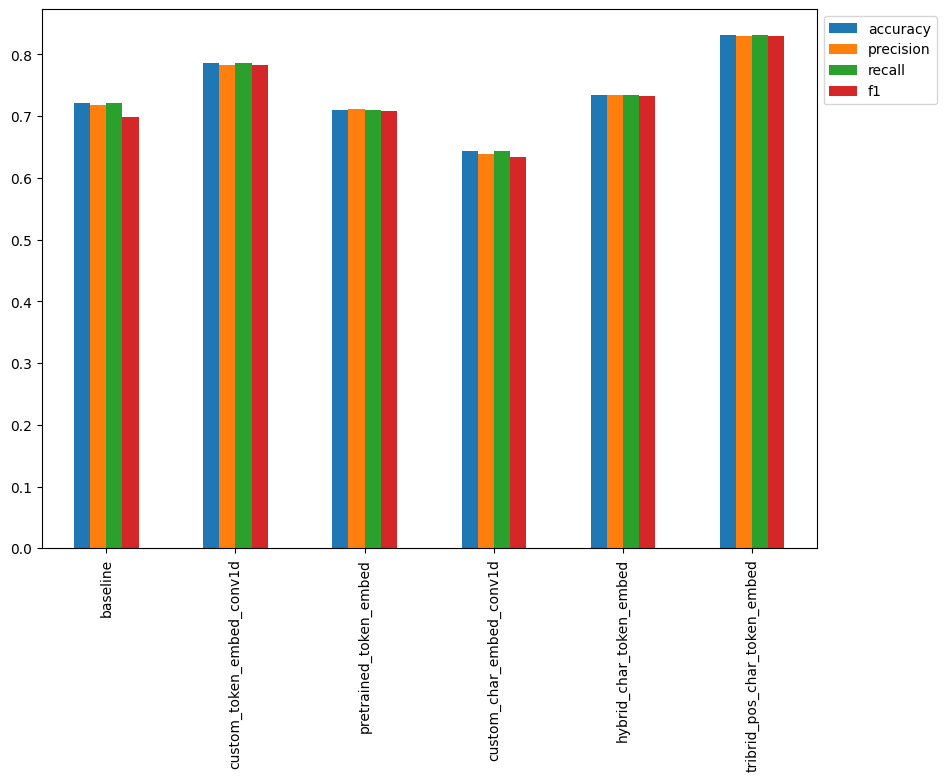

In [131]:
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

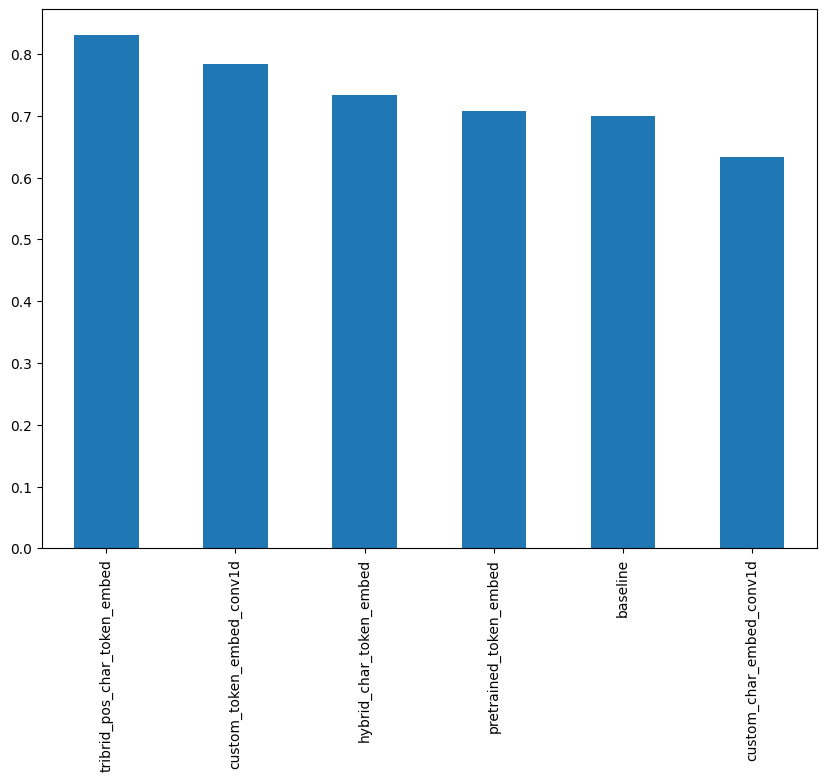

In [132]:
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

## Test dataset

In [133]:
test_pos_char_token_data = tf.data.Dataset.from_tensor_slices((test_line_numbers_one_hot,
                                                               test_total_lines_one_hot,
                                                               test_sentences,
                                                               test_chars))
test_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_pos_char_token_dataset = tf.data.Dataset.zip((test_pos_char_token_data, test_pos_char_token_labels))
test_pos_char_token_dataset = test_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# Check shapes
test_pos_char_token_dataset

<_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [134]:
test_pred_probs = model_5.predict(test_pos_char_token_dataset,
                                       verbose=1)
test_preds = tf.argmax(test_pred_probs, axis=1)
test_preds[:10]

942/942 [==============================] - 59s 62ms/step


<tf.Tensor: shape=(10,), dtype=int64, numpy=array([3, 3, 2, 2, 4, 4, 4, 1, 1, 0])>

In [135]:
loaded_model_test_results = calculate_results(y_true=test_labels_encoded,
                                              y_pred=test_preds)
loaded_model_test_results

{'accuracy': 82.50207400033183,
 'precision': 0.8238145420608166,
 'recall': 0.8250207400033184,
 'f1': 0.8241425549959109}

##most wrong

In [136]:
%%time
test_pred_classes = [label_encoder.classes_[pred] for pred in test_preds]
test_pred_classes

CPU times: user 8.26 s, sys: 25.6 ms, total: 8.28 s
Wall time: 8.39 s


['OBJECTIVE',
 'OBJECTIVE',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'BACKGROUND',
 'OBJECTIVE',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'BACKGROUND',
 'OBJECTIVE',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'BACKGROUND',
 'METHODS',
 'BACKGROUND',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'BACKGROUND',
 'BACKGROUND',
 'BACKGROUND',
 'OBJECTIVE',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'OBJECTIVE',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'OBJECTIVE',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'METHODS',
 'RESULTS',
 'RESULTS

In [137]:
test_df["prediction"] = test_pred_classes # create column with test prediction class names
test_df["pred_prob"] = tf.reduce_max(test_pred_probs, axis=1).numpy() # get the maximum prediction probability
test_df["correct"] = test_df["prediction"] == test_df["target"] # create binary column for whether the prediction is right or not
test_df.head(20)

,line_number,target,text,total_lines,prediction,pred_prob,correct
0,0,BACKGROUND,this study analyzed liver function abnormaliti...,8,OBJECTIVE,0.498393,False
1,1,RESULTS,a post hoc analysis was conducted with the use...,8,OBJECTIVE,0.357519,False
2,2,RESULTS,liver function tests ( lfts ) were measured at...,8,METHODS,0.766219,False
3,3,RESULTS,survival analyses were used to assess the asso...,8,METHODS,0.592379,False
4,4,RESULTS,the percentage of patients with abnormal lfts ...,8,RESULTS,0.675146,True
5,5,RESULTS,when mean hemodynamic profiles were compared i...,8,RESULTS,0.877469,True
6,6,RESULTS,multivariable analyses revealed that patients ...,8,RESULTS,0.564480,True
7,7,CONCLUSIONS,abnormal lfts are common in the adhf populatio...,8,CONCLUSIONS,0.437946,True
8,8,CONCLUSIONS,elevated meld-xi scores are associated with po...,8,CONCLUSIONS,0.456967,True
9,0,BACKGROUND,minimally invasive endovascular aneurysm repai...,12,BACKGROUND,0.555106,True


In [138]:
top_100_wrong = test_df[test_df["correct"] == False].sort_values("pred_prob", ascending=False)[:100]
top_100_wrong

,line_number,target,text,total_lines,prediction,pred_prob,correct
13874,4,CONCLUSIONS,symptom outcomes will be assessed and estimate...,6,METHODS,0.950832,False
16347,0,BACKGROUND,to evaluate the effects of the lactic acid bac...,12,OBJECTIVE,0.934625,False
13598,6,METHODS,-@ % vs. fish : -@ % vs. fish + s : -@ % ; p <...,9,RESULTS,0.922194,False
2388,4,RESULTS,the primary endpoint is the cumulative three-y...,13,METHODS,0.922122,False
3573,3,RESULTS,a cluster randomised trial was implemented wit...,16,METHODS,0.912687,False
...,...,...,...,...,...,...,...
22736,4,OBJECTIVE,"the national institute of oncology , budapest ...",20,METHODS,0.831320,False
18002,11,RESULTS,application of loperamide hcl in a liposomal g...,20,CONCLUSIONS,0.831304,False
2219,7,CONCLUSIONS,among men and women with moderately elevated b...,8,RESULTS,0.830659,False
12304,2,BACKGROUND,"the severity of psychiatric symptoms , as meas...",16,METHODS,0.829982,False


In [139]:
for row in top_100_wrong[0:10].itertuples(): # adjust indexes to view different samples
  _, target, text, line_number, total_lines, prediction, pred_prob, _ = row
  print(f"Target: {target}, Pred: {prediction}, Prob: {pred_prob}, Line number: {line_number}, Total lines: {total_lines}\n")
  print(f"Text:\n{text}\n")
  print("-----\n")

Target: 4, Pred: METHODS, Prob: 0.9508321285247803, Line number: symptom outcomes will be assessed and estimates of cost-effectiveness made .
, Total lines: 6

Text:
CONCLUSIONS

-----

Target: 0, Pred: OBJECTIVE, Prob: 0.9346249103546143, Line number: to evaluate the effects of the lactic acid bacterium lactobacillus salivarius on caries risk factors .
, Total lines: 12

Text:
BACKGROUND

-----

Target: 6, Pred: RESULTS, Prob: 0.922193706035614, Line number: -@ % vs. fish : -@ % vs. fish + s : -@ % ; p < @ ) but there were no significant differences between groups .
, Total lines: 9

Text:
METHODS

-----

Target: 4, Pred: METHODS, Prob: 0.9221218228340149, Line number: the primary endpoint is the cumulative three-year hiv incidence .
, Total lines: 13

Text:
RESULTS

-----

Target: 3, Pred: METHODS, Prob: 0.9126867055892944, Line number: a cluster randomised trial was implemented with @,@ children in @ government primary schools on the south coast of kenya in @-@ .
, Total lines: 16



## Real example

In [140]:
import json
# Download and open example abstracts (copy and pasted from PubMed)
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/skimlit_example_abstracts.json

with open("skimlit_example_abstracts.json", "r") as f:
  example_abstracts = json.load(f)

example_abstracts

--2023-12-22 06:02:39--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/skimlit_example_abstracts.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6737 (6.6K) [text/plain]
Saving to: ‘skimlit_example_abstracts.json’

skimlit_example_abs 100%[===================>]   6.58K  --.-KB/s    in 0s      

2023-12-22 06:02:39 (52.8 MB/s) - ‘skimlit_example_abstracts.json’ saved [6737/6737]



[{'abstract': 'This RCT examined the efficacy of a manualized social intervention for children with HFASDs. Participants were randomly assigned to treatment or wait-list conditions. Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language. A response-cost program was applied to reduce problem behaviors and foster skills acquisition. Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures). Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents. High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity. Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.',
  'source': 'https://pubmed.ncbi.nlm.nih.gov/20232240/',
  'details': 'RCT of a manualiz

In [141]:
abstracts = pd.DataFrame(example_abstracts)
abstracts

,abstract,source,details
0,This RCT examined the efficacy of a manualized...,https://pubmed.ncbi.nlm.nih.gov/20232240/,RCT of a manualized social treatment for high-...
1,Postpartum depression (PPD) is the most preval...,https://pubmed.ncbi.nlm.nih.gov/28012571/,Formatting removed (can be used to compare mod...
2,"Mental illness, including depression, anxiety ...",https://pubmed.ncbi.nlm.nih.gov/28942748/,Effect of nutrition on mental health
3,Hepatitis C virus (HCV) and alcoholic liver di...,https://pubmed.ncbi.nlm.nih.gov/22244707/,Baclofen promotes alcohol abstinence in alcoho...


In [142]:
from spacy.lang.en import English
nlp = English() # setup English sentence parser

# New version of spaCy
sentencizer = nlp.add_pipe("sentencizer") # create sentence splitting pipeline object

# Old version of spaCy
# sentencizer = nlp.create_pipe("sentencizer") # create sentence splitting pipeline object
# nlp.add_pipe(sentencizer) # add sentence splitting pipeline object to sentence parser

# Create "doc" of parsed sequences, change index for a different abstract
doc = nlp(example_abstracts[0]["abstract"])
abstract_lines = [str(sent) for sent in list(doc.sents)] # return detected sentences from doc in string type (not spaCy token type)
abstract_lines

['This RCT examined the efficacy of a manualized social intervention for children with HFASDs.',
 'Participants were randomly assigned to treatment or wait-list conditions.',
 'Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language.',
 'A response-cost program was applied to reduce problem behaviors and foster skills acquisition.',
 'Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures).',
 'Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents.',
 'High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity.',
 'Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.']

In [143]:
# Get total number of lines
total_lines_in_sample = len(abstract_lines)

# Go through each line in abstract and create a list of dictionaries containing features for each line
sample_lines = []
for i, line in enumerate(abstract_lines):
  sample_dict = {}
  sample_dict["text"] = str(line)
  sample_dict["line_number"] = i
  sample_dict["total_lines"] = total_lines_in_sample - 1
  sample_lines.append(sample_dict)
sample_lines

[{'text': 'This RCT examined the efficacy of a manualized social intervention for children with HFASDs.',
  'line_number': 0,
  'total_lines': 7},
 {'text': 'Participants were randomly assigned to treatment or wait-list conditions.',
  'line_number': 1,
  'total_lines': 7},
 {'text': 'Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language.',
  'line_number': 2,
  'total_lines': 7},
 {'text': 'A response-cost program was applied to reduce problem behaviors and foster skills acquisition.',
  'line_number': 3,
  'total_lines': 7},
 {'text': 'Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures).',
  'line_number': 4,
  'total_lines': 7},
 {'text': 'Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents.',
  'line_number': 5,
  'total_lines': 7},
 {'text'

In [144]:
# Get all line_number values from sample abstract
test_abstract_line_numbers = [line["line_number"] for line in sample_lines]
# One-hot encode to same depth as training data, so model accepts right input shape
test_abstract_line_numbers_one_hot = tf.one_hot(test_abstract_line_numbers, depth=15)
test_abstract_line_numbers_one_hot

<tf.Tensor: shape=(8, 15), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)>

In [145]:
# Get all total_lines values from sample abstract
test_abstract_total_lines = [line["total_lines"] for line in sample_lines]
# One-hot encode to same depth as training data, so model accepts right input shape
test_abstract_total_lines_one_hot = tf.one_hot(test_abstract_total_lines, depth=20)
test_abstract_total_lines_one_hot

<tf.Tensor: shape=(8, 20), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

In [146]:
# Split abstract lines into characters
abstract_chars = [split_chars(sentence) for sentence in abstract_lines]
abstract_chars

['T h i s   R C T   e x a m i n e d   t h e   e f f i c a c y   o f   a   m a n u a l i z e d   s o c i a l   i n t e r v e n t i o n   f o r   c h i l d r e n   w i t h   H F A S D s .',
 'P a r t i c i p a n t s   w e r e   r a n d o m l y   a s s i g n e d   t o   t r e a t m e n t   o r   w a i t - l i s t   c o n d i t i o n s .',
 'T r e a t m e n t   i n c l u d e d   i n s t r u c t i o n   a n d   t h e r a p e u t i c   a c t i v i t i e s   t a r g e t i n g   s o c i a l   s k i l l s ,   f a c e - e m o t i o n   r e c o g n i t i o n ,   i n t e r e s t   e x p a n s i o n ,   a n d   i n t e r p r e t a t i o n   o f   n o n - l i t e r a l   l a n g u a g e .',
 'A   r e s p o n s e - c o s t   p r o g r a m   w a s   a p p l i e d   t o   r e d u c e   p r o b l e m   b e h a v i o r s   a n d   f o s t e r   s k i l l s   a c q u i s i t i o n .',
 'S i g n i f i c a n t   t r e a t m e n t   e f f e c t s   w e r e   f o u n d   f o r   f i v e   o f   s e v e n   p 

In [147]:
%%time
test_abstract_pred_probs = model_5.predict(x=(test_abstract_line_numbers_one_hot,
                                                   test_abstract_total_lines_one_hot,
                                                   tf.constant(abstract_lines),
                                                   tf.constant(abstract_chars)))
test_abstract_pred_probs

1/1 [==============================] - 2s 2s/step
CPU times: user 1.96 s, sys: 85.2 ms, total: 2.05 s
Wall time: 2.02 s


array([[0.27433345, 0.09081593, 0.01760222, 0.5868537 , 0.03039462],
       [0.06346364, 0.02926554, 0.72861093, 0.09176236, 0.08689751],
       [0.12895015, 0.03687639, 0.53598785, 0.17913976, 0.11904592],
       [0.07102233, 0.09122036, 0.6110241 , 0.07668079, 0.15005234],
       [0.05698523, 0.08008297, 0.36212048, 0.05709985, 0.44371146],
       [0.03322761, 0.10138519, 0.4876909 , 0.04840803, 0.3292883 ],
       [0.02893082, 0.11511863, 0.0691238 , 0.02599957, 0.7608272 ],
       [0.01760731, 0.09968998, 0.25624183, 0.03638673, 0.5900742 ]],
      dtype=float32)

In [148]:
test_abstract_preds = tf.argmax(test_abstract_pred_probs, axis=1)
test_abstract_preds

<tf.Tensor: shape=(8,), dtype=int64, numpy=array([3, 2, 2, 2, 4, 2, 4, 4])>

In [149]:
test_abstract_pred_classes = [label_encoder.classes_[i] for i in test_abstract_preds]
test_abstract_pred_classes

['OBJECTIVE',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'METHODS',
 'RESULTS',
 'RESULTS']

In [150]:
for i, line in enumerate(abstract_lines):
  print(f"{test_abstract_pred_classes[i]}: {line}")

OBJECTIVE: This RCT examined the efficacy of a manualized social intervention for children with HFASDs.
METHODS: Participants were randomly assigned to treatment or wait-list conditions.
METHODS: Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language.
METHODS: A response-cost program was applied to reduce problem behaviors and foster skills acquisition.
RESULTS: Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures).
METHODS: Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents.
RESULTS: High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity.
RESULTS: Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.
